In [1]:
#!pip install pytrends

  Using cached pandas-1.1.4-cp37-cp37m-macosx_10_9_x86_64.whl (9.9 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 0.24.1
    Uninstalling pandas-0.24.1:
      Successfully uninstalled pandas-0.24.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

lifelines 0.17.0 requires matplotlib<3.0,>=2.0, but you'll have matplotlib 3.0.2 which is incompatible.


In [73]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()

In [167]:
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Interest Over Time

In [ ]:
# Get the keyword set to load data

In [197]:
pytrend.build_payload(kw_list=['make money online'])

In [198]:
# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrend.related_queries()
#print(related_queries_dict)

In [199]:
related_queries_dict

{'make money online': {'top':                             query  value
  0                             how    100
  1                  how make money    100
  2           how make money online     99
  3               how to make money     93
  4                     how to make     92
  5        how to make money online     92
  6       ways to make money online     17
  7              ways to make money     17
  8           gta online make money     15
  9                      gta online     15
  10                    online jobs     12
  11         make money online free     12
  12              free money online     11
  13         make money online fast     11
  14                make money fast     11
  15       way to make money online     10
  16        make money gta 5 online      9
  17                     earn money      8
  18              earn money online      8
  19   how to make money gta online      8
  20        how i make money online      8
  21    make money from ho

In [48]:
## GET THE TIME DEPENDENT DATA FOR THE ONLINE MONEY MAKING

In [200]:
keywords = ['online ways to make money','online jobs','make money online free',
                              'way to make money online','make fast money online','earn money online',
            'make money from home online','apply jobs']

In [201]:
keyword = 'make money online'
pytrend.build_payload(kw_list=[keyword])
time_df = pytrend.interest_over_time()[keyword].reset_index().query('date>@pd.datetime(2019,1,1)')

/Users/apple/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expr.py:631: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  v = getattr(resolved, attr)


In [202]:
for keyword in keywords:
    pytrend.build_payload(kw_list=[keyword])
    new_results = pytrend.interest_over_time()[keyword].reset_index().query('date>@pd.datetime(2020,1,1)')
    time_df = time_df.merge(new_results, on='date')

In [203]:
time_df.head()

,date,make money online,online ways to make money,online jobs,make money online free,way to make money online,make fast money online,earn money online,make money from home online,apply jobs
0,2020-01-05,80,67,86,59,50,69,59,60,95
1,2020-01-12,76,62,70,50,60,59,59,41,89
2,2020-01-19,75,58,71,44,58,61,54,55,90
3,2020-01-26,71,66,68,48,53,53,57,45,79
4,2020-02-02,66,60,69,48,65,50,54,43,83


In [204]:
keywords.append('make money online')

In [205]:
time_df_avg= time_df.set_index('date').mean(axis=1).reset_index().rename(columns = {0:'Make Money Online'})
time_df_avg.head()

,date,Make Money Online
0,2020-01-05,69.444444
1,2020-01-12,62.888889
2,2020-01-19,62.888889
3,2020-01-26,60.000000
4,2020-02-02,59.777778


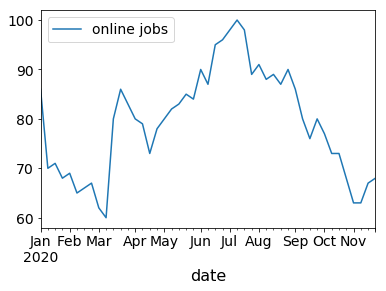

In [206]:
fig, ax = plt.subplots()
time_df.plot(ax=ax, x='date',y='online jobs')

In [207]:
# Get the search for physical jobs
keyword = 'find jobs near me'
pytrend.build_payload(kw_list=[keyword])
interest_over_time_df = pytrend.interest_over_time()

## LOAD CORONA DATA FROM 
https://covidtracking.com/data/download

In [208]:
corona_count = pd.read_csv('national-history.csv')
corona_count['date']= pd.to_datetime(corona_count.date)

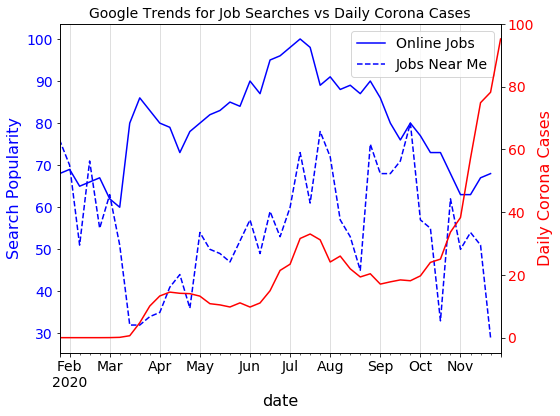

In [209]:
fig, ax = plt.subplots(figsize=(8,6))
color = 'blue'

ax.set_ylabel('Search Popularity', color=color)
time_df.plot(ax=ax, x='date',y='online jobs',color=color)
ax.set_xlabel('Date')
ax.tick_params(axis='y', labelcolor=color)

test_df.reset_index().plot(ax=ax, x='date',y='find jobs near me',color=color, linestyle='--')

plt.legend(['Online Jobs','Jobs Near Me'])

color='red'
ax2 = ax.twinx()
ax2.set_ylabel('Daily Corona Cases', color=color)  # we already handled the x-label with ax1
corona_count.positiveIncrease = 100*corona_count.positiveIncrease/corona_count.positiveIncrease.max()
corona_count.sort_values(by='date').plot(ax=ax2, x='date',y='positiveIncrease',color=color,legend=False)
ax2.tick_params(axis='y', labelcolor=color)

ax.grid(which='major',axis='x',alpha=0.5)
#ax.grid(which='major',axis='x',alpha=0.5)


plt.title('Google Trends for Job Searches vs Daily Corona Cases')
plt.xlabel('Date')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
